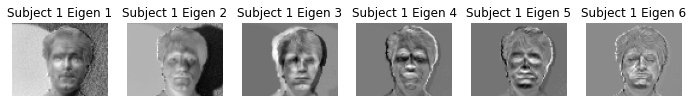

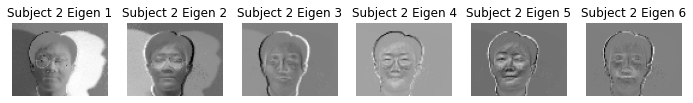

In [2]:
#PartA
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#create list for subject 1
sub_1 = [
    'yalefaces/subject01.leftlight.gif',
    'yalefaces/subject01.sleepy.gif',
    'yalefaces/subject01.wink.gif',
    'yalefaces/subject01.noglasses.gif',
    'yalefaces/subject01.normal.gif',
    'yalefaces/subject01.sad.gif',
    'yalefaces/subject01.surprised.gif',
    'yalefaces/subject01.glasses.gif',
    'yalefaces/subject01.rightlight.gif',
    'yalefaces/subject01.happy.gif'
]

#create list for subject 2
sub_2 = [
    'yalefaces/subject02.leftlight.gif',
    'yalefaces/subject02.sleepy.gif',
    'yalefaces/subject02.wink.gif',
    'yalefaces/subject02.noglasses.gif',
    'yalefaces/subject02.normal.gif',
    'yalefaces/subject02.sad.gif',
    'yalefaces/subject02.glasses.gif',
    'yalefaces/subject02.rightlight.gif',
    'yalefaces/subject02.happy.gif'
]
S1 = []
S2 = []

for i in range(1,3):
    subject = sub_1 if i == 1 else sub_2
    
    for path in subject:
        img = np.array(Image.open(path))
        #source: https://stackoverflow.com/questions/48121916/numpy-resize-rescale-image
        img = img[::4, ::4]
        #print(img.shape)
        new_img = img.reshape((1, -1))  
        #print(new_img)
        
        if i == 1:
            S1.append(new_img)
        else:
            S2.append(new_img)

S1 = np.concatenate(S1, axis=0)
S2 = np.concatenate(S2, axis=0)
#print(S1)
#print(S2)

def plot_eigenimages(U, num_eigen, sub):
    # for horizontal layout
    fig, axes = plt.subplots(1, 6, figsize=(12, 3))

    for i in range(num_eigen):
        e_img = U[:, i].reshape(img.shape[0], img.shape[1])
        axes[i].imshow(e_img, cmap='gray')
        axes[i].set_title(f"{sub} Eigen {i + 1}")
        axes[i].axis('off')

    plt.show()

# PCA for Subject 1- adapted from pca demo code. used SVD to get U
# source: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
S1_mean = np.mean(S1, axis=0)
X1 = (S1.T - S1_mean[:, None])
U1, _, Vh1 = np.linalg.svd(X1)
plot_eigenimages(U1, 6, "Subject 1")

# PCA for Subject 2
S2_mean = np.mean(S2, axis=0)
X2 = (S2.T - S2_mean[:, None])
U2, _, Vh2 = np.linalg.svd(X2)
plot_eigenimages(U2, 6, "Subject 2")


In [3]:
#Part B
import numpy as np
from PIL import Image

#download test images
test_images = ['yalefaces/subject01-test.gif', 'yalefaces/subject02-test.gif']
test= []

for i in test_images:
    img = np.array(Image.open(i))
    img = img[::4, ::4]  
    new_img = img.reshape((1, -1))  
    test.append(new_img)

#print(np.array(test))
#get only the top 6 eigenvalues
U1_5= U1[: ,0:5]
U2_5= U2[: ,0:5]

sub1_mu= (test[0] - S1_mean[:,None])
sub2_mu= (test[1] - S2_mean[:,None])

#print(test_sub2)
s= []
#residual equation = test - eigenvalue dot eigenvalue.T dot test **2
s_11 = np.linalg.norm(sub1_mu - (np.dot(U1_5,U1_5.T))@(sub1_mu))**2
print("s11 is: {}".format(s_11))
s_12 = np.linalg.norm(sub2_mu - (np.dot(U1_5,U1_5.T))@(sub2_mu))**2
print("s12 is: {}".format(s_12))
s_21 = np.linalg.norm(sub1_mu - (np.dot(U2_5,U2_5.T))@(sub1_mu))**2
print("s21 is: {}".format(s_21))
s_22 = np.linalg.norm(sub2_mu - (np.dot(U2_5,U2_5.T))@(sub2_mu))**2
print("s22 is: {}".format(s_22))

s11 is: 103255466174.61678
s12 is: 173199732542.8488
s21 is: 152083350449.732
s22 is: 247041910994.39948
